<a href="https://colab.research.google.com/github/Sandeep12-2021/LetsUpgrade-Data-Analysis/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("/haberman.csv")



# Exploratory Data Analysis


Here we are having four things:


1.   Age of the people who got operation
2.   Year of the operation
3.    Axillary Nodes
4.    It is the target which consist of two people:
          1. Having value 1 which indicates people who lived even after five years
          2. People who died within five years











In [30]:
# in our dataset we have columns with there values directly
print(data.shape)

(305, 4)


In [10]:
print(data.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


In [16]:
features = [i for i in data.columns]

In [17]:
# here our target is 1.1 as we need to see if the other features are applied do the 
# applied what will be the value of the target in that given scenario
for i in features:
      print(data[i],"\n")

0      30
1      30
2      31
3      31
4      33
       ..
300    75
301    76
302    77
303    78
304    83
Name: 30, Length: 305, dtype: int64 

0      62
1      65
2      59
3      65
4      58
       ..
300    62
301    67
302    65
303    65
304    58
Name: 64, Length: 305, dtype: int64 

0       3
1       0
2       2
3       4
4      10
       ..
300     1
301     0
302     3
303     1
304     2
Name: 1, Length: 305, dtype: int64 

0      1
1      1
2      1
3      1
4      1
      ..
300    1
301    1
302    1
303    2
304    2
Name: 1.1, Length: 305, dtype: int64 



In [34]:
# here we seperate our label from features
features.pop()
labels=data['1.1']
print(features)

['30', '64']


# Analysis with graphs


# Univariate Analysis

# Pdf(Probability Density Function)

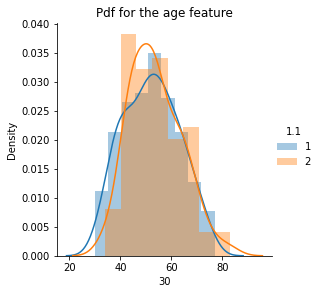

In [8]:
# Age analysis
sns.FacetGrid(data, hue="1.1",size=4).map(sns.distplot,'30').add_legend()
plt.title('Pdf for the age feature')
plt.show()

From this we can conclude that it is likely that people from 30 to somewhere 75 are prone to die within 5 years as blue part is spread from there.

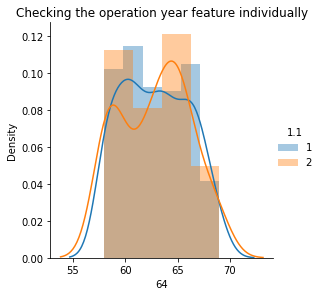

In [14]:
# pdf for the other feature i.e operation year
sns.FacetGrid(data,hue='1.1',size=4).map(sns.distplot,'64').add_legend()
plt.title("Checking the operation year feature individually")
plt.show()

As we can see there is high so we can't derive any great observation.

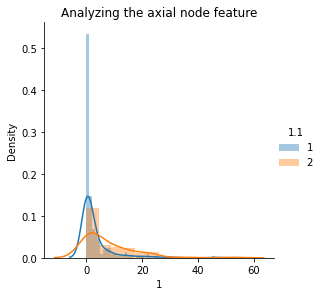

In [15]:
# plotting the axial nodes
sns.FacetGrid(data,hue="1.1",size=4).map(sns.distplot,'1').add_legend()
plt.title("Analyzing the axial node feature")
plt.show()

Here as we can see from 0 to somewhere 20 the people are more likely to be type-1

# CDF(Cumalative Distribution Function)

In [19]:
# means cdf is cumalative sum of pdf
cls1 = data.loc[data['1.1']==1]
cls2 = data.loc[data['1.1']==2]

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


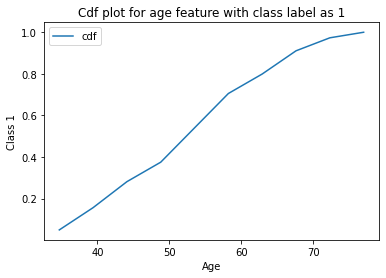

In [22]:
count, binEdges = np.histogram(cls1['30'],bins=10,density=True)
pdf = count/sum(count)
print(pdf)
print(binEdges)
cdf = np.cumsum(pdf)
plt.plot(binEdges[1:],cdf,label='cdf')
plt.title("Cdf plot for age feature with class label as 1")
plt.xlabel('Age')
plt.ylabel("Class 1")
plt.legend()
plt.show()

1.   People with age greater than 50 are more likely to survive
2.   Nearly 90% of the patients are having age less than or equal to 70 



[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


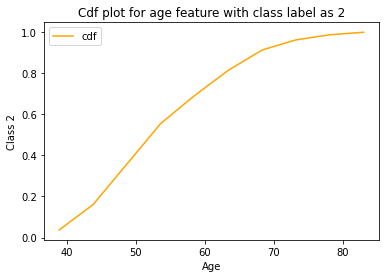

In [23]:
# Age for the class2
count, binEdges = np.histogram(cls2['30'],bins=10,density=True)
pdf = count/sum(count)
print(pdf)
print(binEdges)
cdf = np.cumsum(pdf)
plt.plot(binEdges[1:],cdf,label='cdf',c="orange")
plt.title("Cdf plot for age feature with class label as 2")
plt.xlabel('Age')
plt.ylabel("Class 2")
plt.legend()
plt.show()

1. Looking at this we can conclude that people with age greater than 50 are more likely to survive
2. more than 90% of the people comes under age of 80

[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


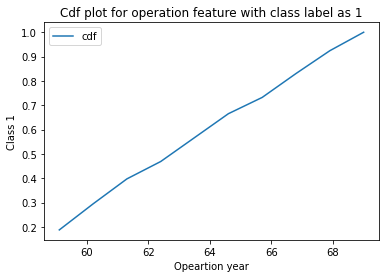

In [32]:
# Operation year for the class1
count, binEdges = np.histogram(cls1['64'],bins=10,density=True)
pdf = count/sum(count)
print(pdf)
print(binEdges)
cdf = np.cumsum(pdf)
plt.plot(binEdges[1:],cdf,label='cdf')
plt.title("Cdf plot for operation feature with class label as 1")
plt.xlabel('Opeartion year')
plt.ylabel("Class 1")
plt.legend()
plt.show()

60% people who had operation hadve opeartion year less than 64

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


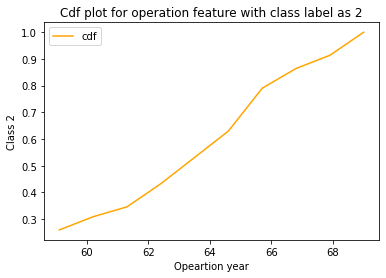

In [33]:
# Operation year for the class2
count, binEdges = np.histogram(cls2['64'],bins=10,density=True)
pdf = count/sum(count)
print(pdf)
print(binEdges)
cdf = np.cumsum(pdf)
plt.plot(binEdges[1:],cdf,label='cdf',c="orange")
plt.title("Cdf plot for operation feature with class label as 2")
plt.xlabel('Opeartion year')
plt.ylabel("Class 2")
plt.legend()
plt.show()

Here we can see that 80% people had that there operation before year 1966

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


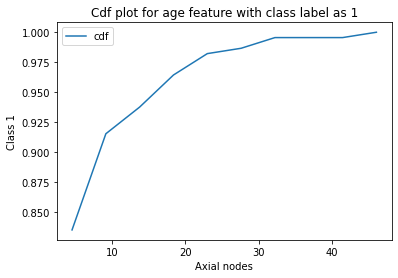

In [31]:
# Axial nodes for the class1
count, binEdges = np.histogram(cls1['1'],bins=10,density=True)
pdf = count/sum(count)
print(pdf)
print(binEdges)
cdf = np.cumsum(pdf)
plt.plot(binEdges[1:],cdf,label='cdf')
plt.title("Cdf plot for axil node feature with class label as 1")
plt.xlabel('Axial nodes')
plt.ylabel("Class 1")
plt.legend()
plt.show()

Nearly 95% people have less than 20 axial nodes


[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


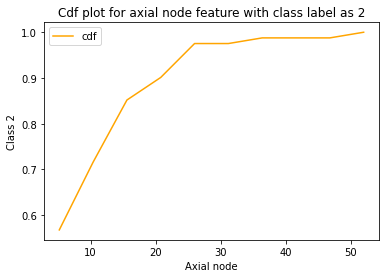

In [34]:
# Axial node for the class2
count, binEdges = np.histogram(cls2['1'],bins=10,density=True)
pdf = count/sum(count)
print(pdf)
print(binEdges)
cdf = np.cumsum(pdf)
plt.plot(binEdges[1:],cdf,label='cdf',c="orange")
plt.title("Cdf plot for axial node feature with class label as 2")
plt.xlabel('Axial node')
plt.ylabel("Class 2")
plt.legend()
plt.show()

More than 80% of people have axial nodes less than 20

# Boxplots


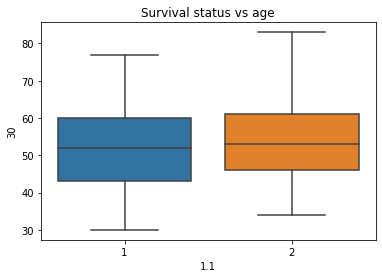

In [38]:
sns.boxplot(x='1.1',y='30',data=data)
plt.title("Survival status vs age")
plt.show()

1. We can see that 95% of datapoints are overlapping with almost same median

Hence age is not much useful

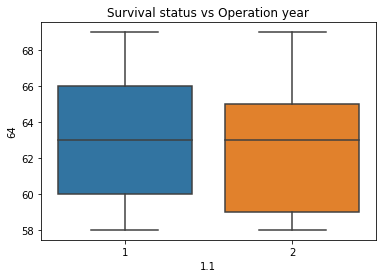

In [39]:
sns.boxplot('1.1','64',data=data)
plt.title("Survival status vs Operation year")
plt.show()

1.   25-75% of the class 1 people had operation in 60-64 year 
2.   75% of the class 2 people had operation in year 59-63
3. Nearly  40% of the data overlap and they share almost same median



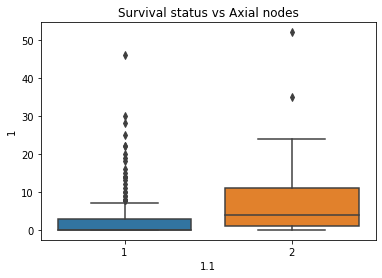

In [40]:
sns.boxplot('1.1','1',data=data)
plt.title("Survival status vs Axial nodes")
plt.show()

75% quartile of the class1 overlap with 50% of the quartile of the class 2

# Bivariate Analysis

# Scatter Plot

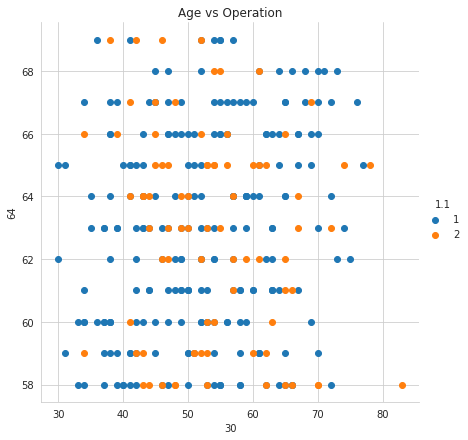

In [43]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="1.1",size=6).map(plt.scatter,"30","64").add_legend()
plt.title("Age vs Operation")
plt.show()

Most of the people from age 30-40 are of class 1

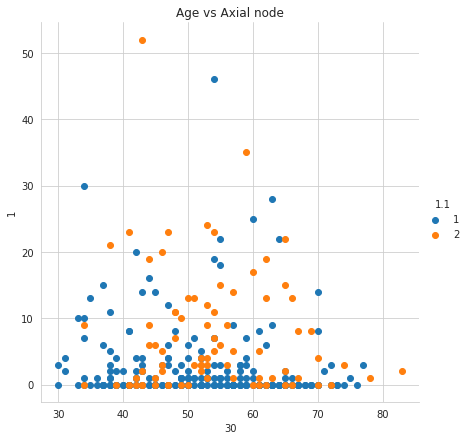

In [44]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="1.1",size=6).map(plt.scatter,"30","1").add_legend()
plt.title("Age vs Axial node")
plt.show()

Both classes have some outliers and they are pretty overlapping

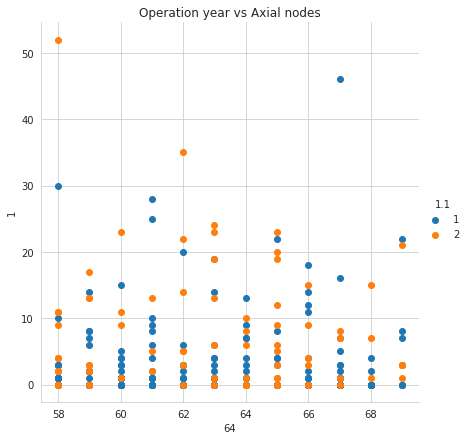

In [45]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="1.1",size=6).map(plt.scatter,"64","1").add_legend()
plt.title("Operation year vs Axial nodes")
plt.show()

Most of the people with 0 axial nodes are of class 2

# Pair plot

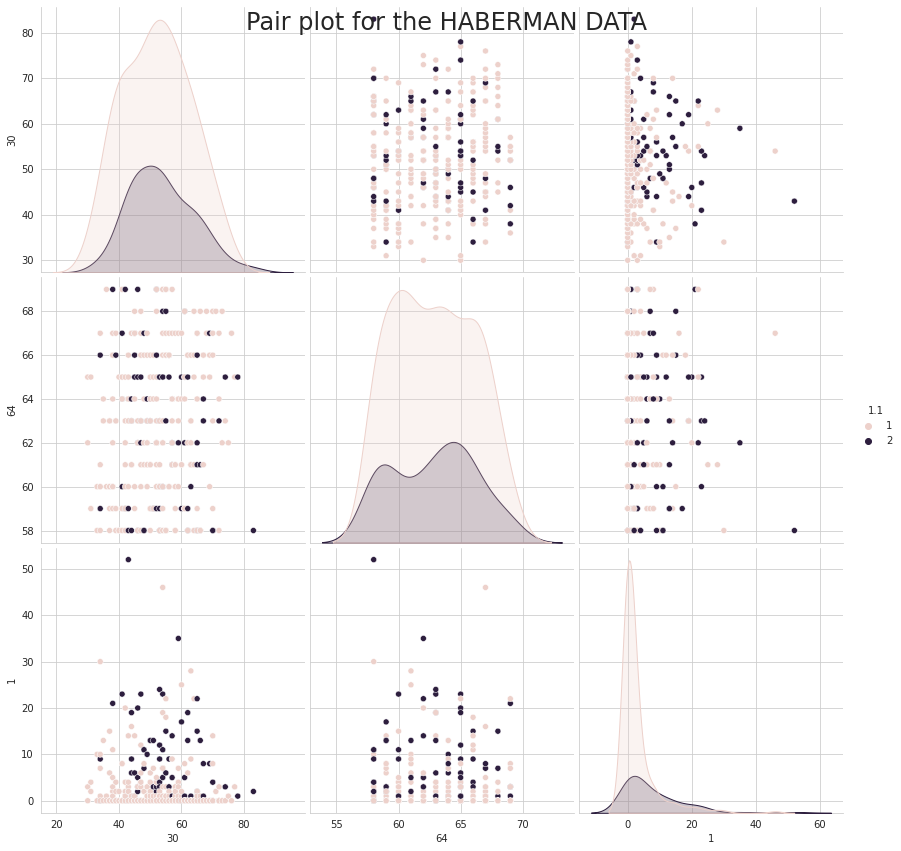

In [49]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="1.1",size=4)
plt.suptitle("Pair plot for the HABERMAN DATA",size=24)
plt.show()

Its highly difficult to predict the class of the person because of huge overlapping.